Importing Libraries 

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

Data Loading

In [94]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [95]:
len(X_train)

60000

In [96]:
len(X_test)

10000

In [97]:
X_train[0].shape

(28, 28)

In [98]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

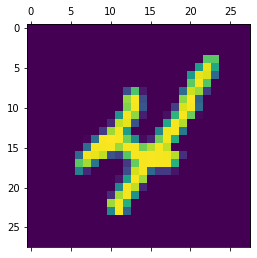

In [99]:
plt.matshow(X_train[9])

In [100]:
y_train[0]

5

Normalizing the training dataset

In [101]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

Convolutional Neural Network (CNN) to train images

In [103]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [104]:
convolutional_neural_network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
convolutional_neural_network.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2168 - accuracy: 0.9331
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0796 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0578 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0341 - accuracy: 0.9894


Making Predictions

In [105]:
convolutional_neural_network.evaluate(X_test, y_test)

In [107]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [108]:
y_predicted_by_model[0]

array([1.6776772e-08, 4.3600943e-05, 3.0069875e-06, 8.3240479e-07,
       5.6861631e-07, 4.2890269e-09, 2.7857970e-12, 9.9995059e-01,
       4.9734911e-08, 1.3127101e-06], dtype=float32)

np.argmax finds a maximum element from an array and returns the index of it

In [109]:
np.argmax(y_predicted_by_model[0])

7

In [113]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [114]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Confusion Matix

In [115]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    2,    0,    3,    1,    0,    0],
       [   0, 1131,    0,    0,    1,    0,    2,    1,    0,    0],
       [   2,    1, 1011,    1,    0,    0,    4,   12,    1,    0],
       [   1,    0,    3, 1000,    0,    3,    0,    2,    1,    0],
       [   0,    0,    1,    0,  978,    0,    2,    0,    0,    1],
       [   6,    0,    1,    7,    0,  859,   16,    1,    1,    1],
       [   3,    3,    0,    0,    2,    1,  949,    0,    0,    0],
       [   4,    4,    8,    0,    0,    1,    0, 1009,    2,    0],
       [   6,    0,    5,    2,    2,    0,    9,    2,  947,    1],
       [   6,    2,    2,    2,   14,    2,    1,    5,    5,  970]],
      dtype=int32)>

CM Vizualization

Text(69.0, 0.5, 'Truth')

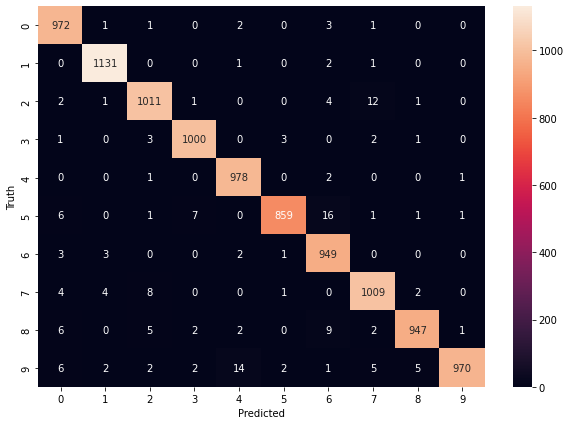

In [118]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')